<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [5]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-01-25 04:01:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  54.7MB/s    in 2.8s    

2025-01-25 04:01:56 (54.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [6]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [7]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [8]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()

**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [9]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [10]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [11]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [12]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [13]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [14]:
# Query for 'CompTotal' 
query = "SELECT CompTotal FROM main"
df = pd.read_sql_query(query, conn)

# Filter out NA values
df_filtered = df['CompTotal'].dropna()

# Calculate IQR
Q1 = df_filtered.quantile(0.25)
Q3 = df_filtered.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter remove outliers
df_clean = df_filtered[(df_filtered >= lower_bound) & (df_filtered <= upper_bound)]

print(df_clean.describe())

count     27864.000000
mean     117182.605369
std       99970.300622
min           0.000000
25%       50000.000000
50%       88000.000000
75%      150000.000000
max      535000.000000
Name: CompTotal, dtype: float64


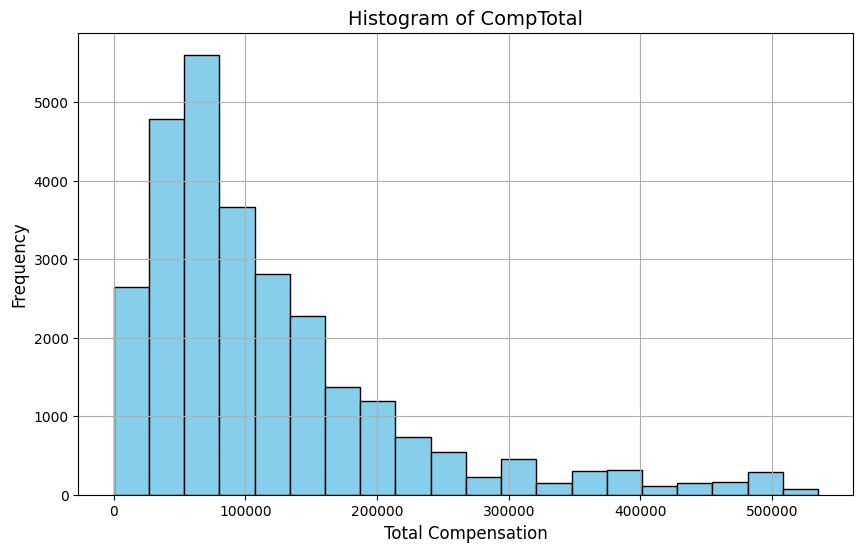

In [15]:
## Write your code here

# Plot the histogram of the cleaned 'CompTotal' column
plt.figure(figsize=(10, 6))
plt.hist(df_clean, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of CompTotal', fontsize=14)
plt.xlabel('Total Compensation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

**Box Plots**

Plot a box plot of Age.


In [16]:
# Query for 'Age' 
query = "SELECT Age FROM main"
df = pd.read_sql_query(query, conn)

print(df['Age'].unique())

['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


In [17]:
# Define the age group ranges
age_group_ranges = {
    'Under 18 years old': (0, 17),
    '18-24 years old': (18, 24),
    '25-34 years old': (25, 34),
    '35-44 years old': (35, 44),
    '45-54 years old': (45, 54),
    '55-64 years old': (55, 64),
    '65 years or older': (65, 100),
    'Prefer not to say': (None, None)
}

# Function to generate a random number based on the age group
def generate_random_age(group):
    if group == 'Prefer not to say':
        return np.nan
    lower, upper = age_group_ranges[group]
    return np.random.randint(lower, upper + 1)

# Apply the function to generate random ages
df['Random_Age'] = df['Age'].apply(generate_random_age)

# Drop rows where Random_Age is NaN (for "Prefer not to say")
df.dropna(subset=['Random_Age'], inplace=True)

# Prepare the data for plotting
age_groups = df['Age'].unique()
data_to_plot = [df[df['Age'] == group]['Random_Age'].values for group in age_groups]

# Display the updated DataFrame
print(df[['Age', 'Random_Age']].head())

                  Age  Random_Age
0  Under 18 years old        16.0
1     35-44 years old        35.0
2     45-54 years old        45.0
3     18-24 years old        22.0
4     18-24 years old        22.0


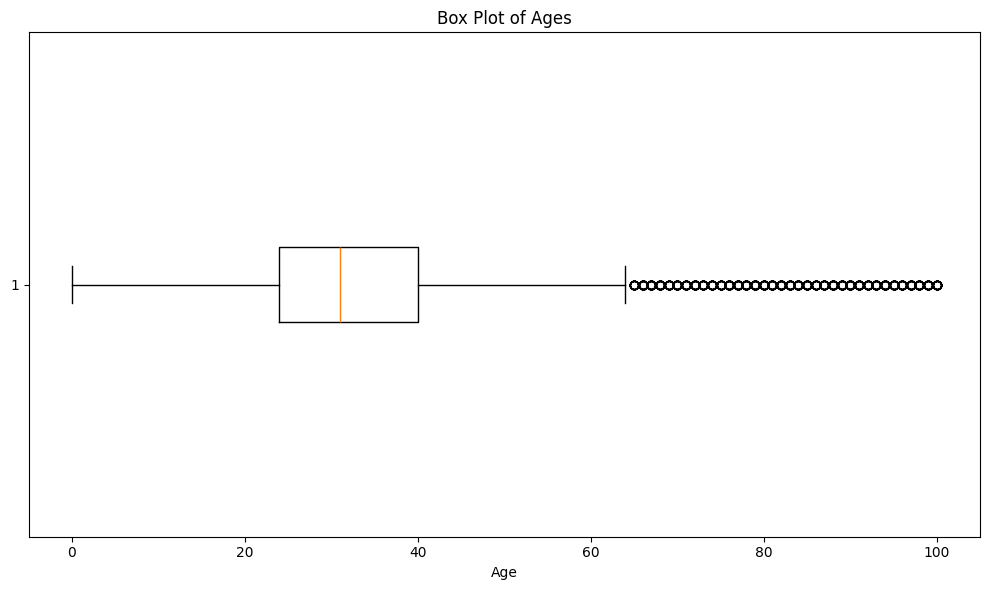

In [18]:
## Write your code here

# Create a box plot for the Random_Age column showing all the data
plt.figure(figsize=(10, 6))
plt.boxplot(df['Random_Age'], vert=False)

# Add labels and title
plt.title('Box Plot of Ages')
plt.xlabel('Age')
plt.ylabel('')

# Show the plot
plt.tight_layout()
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


In [24]:
# Query to get WorkExp from the database
query = "SELECT Age, WorkExp FROM main"
new_data = pd.read_sql_query(query, conn)

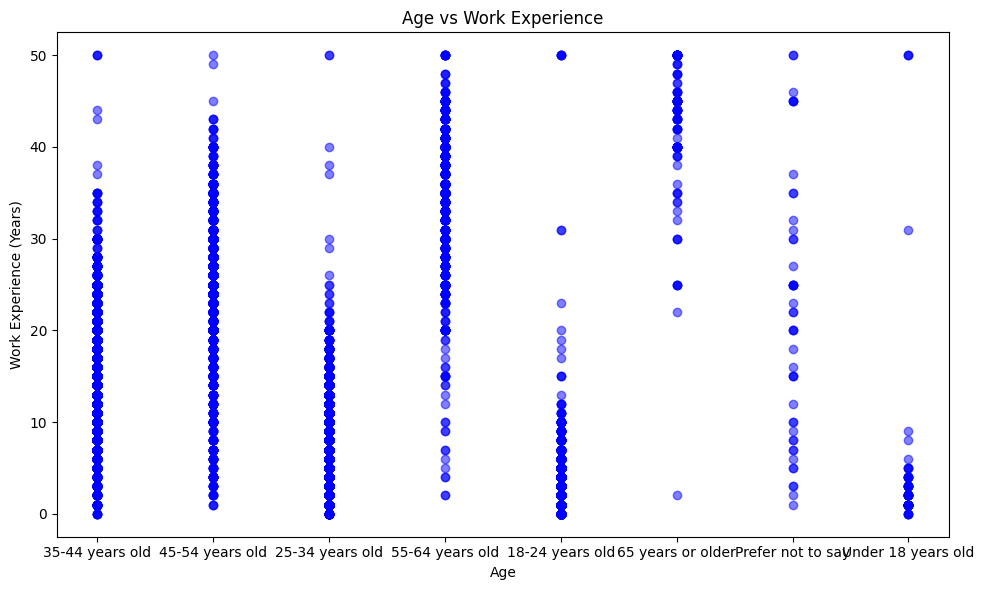

In [25]:
# Drop rows with NaN values in 'Age' or 'WorkExp'
new_data.dropna(subset=['Age', 'WorkExp'], inplace=True)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(new_data['Age'], new_data['WorkExp'], alpha=0.5, color='blue')

# Add labels and title
plt.title('Age vs Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')

# Show the plot
plt.tight_layout()
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [62]:
# Query to extract the required columns
QUERY = "SELECT TimeSearching, Frustration, Age FROM main"
df_bubble = pd.read_sql_query(QUERY, conn)

# Print unique values for the three columns
print("Unique values for the bubble plot columns:")
for column in ['TimeSearching', 'Age', 'Frustration']:
    print(f"Unique values in '{column}':")
    print(df_bubble[column].unique())
    print()

Unique values for the bubble plot columns:
Unique values in 'TimeSearching':
[None '30-60 minutes a day' '60-120 minutes a day' '15-30 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day']

Unique values in 'Age':
['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']

Unique values in 'Frustration':
[None
 'Amount of technical debt;Number of software tools in use;Tracking my work;Showing my contributions'
 'Amount of technical debt;Complexity of tech stack for deployment'
 'Amount of technical debt;Complexity of tech stack for deployment;Complexity of tech stack for build;Maintaining security of code being produced'
 'Amount of technical debt;Tracking my work;Complexity of tech stack for build;Patching/updating core components;Maintaining security of systems/platforms used in work;Reliability of tools/systems used in work'
 'Number of software tools in use;Tracking my w

In [68]:
# Function to extract the first frustration category before the ';'
def extract_first_frustration(frustration_str):
    if isinstance(frustration_str, str):
        return frustration_str.split(';')[0]  # Take the first value before the semicolon
    return None  # Return None if the value is not a string

# Apply the extraction function to the 'Frustration' column
df_bubble['Frustration'] = df_bubble['Frustration'].apply(extract_first_frustration)

# Check the unique values in 'Frustration' after the extraction
print("Unique values in 'Frustration' after extraction:")
print(df_bubble['Frustration'].unique())

frustration_counts = df_bubble['Frustration'].value_counts()

print("Frustration counts:")
print(frustration_counts)

Unique values in 'Frustration' after extraction:
['Amount of technical debt' 'Number of software tools in use'
 'None of these' 'Complexity of tech stack for deployment'
 'Complexity of tech stack for build' 'Patching/updating core components'
 'Maintaining security of code being produced' 'Tracking my work'
 'Showing my contributions' 'Reliability of tools/systems used in work'
 'Maintaining security of systems/platforms used in work']
Frustration counts:
Frustration
Amount of technical debt                                  17483
None of these                                              2344
Tracking my work                                           2164
Number of software tools in use                            2140
Complexity of tech stack for deployment                    1390
Showing my contributions                                    663
Complexity of tech stack for build                          619
Maintaining security of code being produced                 420
Patching/updati

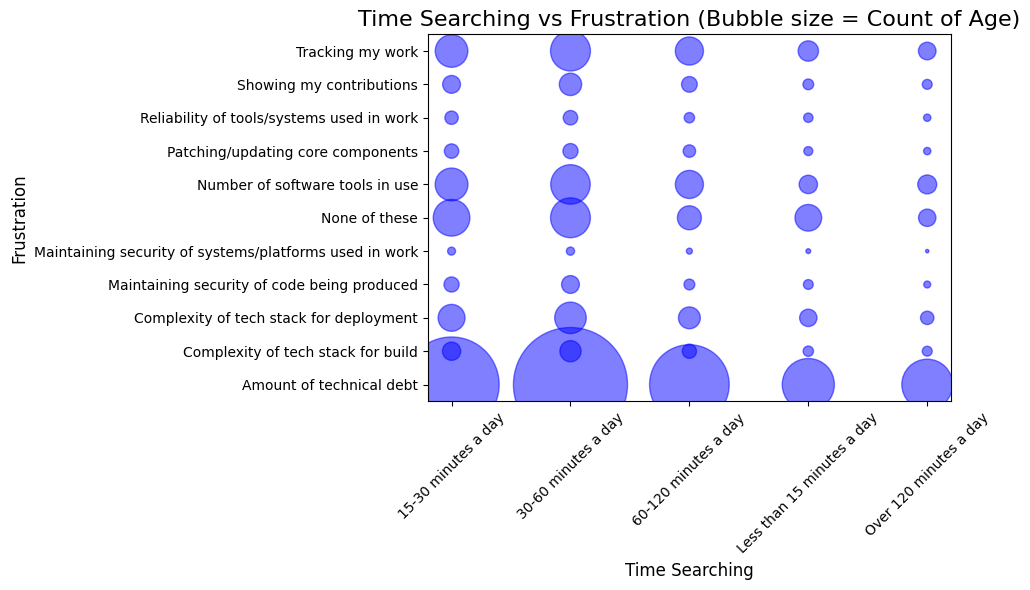

In [72]:
## Write your code here

# Grouping data by 'TimeSearching' and 'Frustration' and counting 'Numerical_Age'
plot_data = df_bubble.groupby(['TimeSearching', 'Frustration'])['Numerical_Age'].count().reset_index()

# Create a dictionary to map 'TimeSearching' and 'Frustration' to numerical values for plotting
time_searching_mapping = {value: idx for idx, value in enumerate(plot_data['TimeSearching'].unique())}
frustration_mapping = {value: idx for idx, value in enumerate(plot_data['Frustration'].unique())}

# Map the categorical values to numerical values for plotting
plot_data['TimeSearching_num'] = plot_data['TimeSearching'].map(time_searching_mapping)
plot_data['Frustration_num'] = plot_data['Frustration'].map(frustration_mapping)

# Create a bubble plot
plt.figure(figsize=(10, 6))

# Bubble size proportional to the count of 'Numerical_Age'
bubble_size = plot_data['Numerical_Age'] * 1

# Scatter plot with TimeSearching on x, Frustration on y, and bubble size proportional to Numerical_Age
plt.scatter(plot_data['TimeSearching_num'], plot_data['Frustration_num'], s=bubble_size, alpha=0.5, color='blue')

# Adding labels and title
plt.title('Time Searching vs Frustration (Bubble size = Count of Age)', fontsize=16)
plt.xlabel('Time Searching', fontsize=12)
plt.ylabel('Frustration', fontsize=12)

# Set custom x and y axis labels based on the mapping
plt.xticks(list(time_searching_mapping.values()), list(time_searching_mapping.keys()), rotation=45)
plt.yticks(list(frustration_mapping.values()), list(frustration_mapping.keys()))

# Show the plot
plt.tight_layout()
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [73]:
# Query to get 'DatabaseWantToWorkWith' from the database
query = "SELECT DatabaseWantToWorkWith FROM main"  # Replace 'main' with your actual table name
db_data = pd.read_sql_query(query, conn)

# Count the occurrences of each database
db_counts = db_data['DatabaseWantToWorkWith'].value_counts()

# Print the unique values and their counts
print("Unique values and their counts for 'DatabaseWantToWorkWith':")
print(db_counts)

Unique values and their counts for 'DatabaseWantToWorkWith':
DatabaseWantToWorkWith
PostgreSQL                                                                 3738
PostgreSQL;SQLite                                                          1533
SQLite                                                                     1476
Microsoft SQL Server                                                       1431
MySQL                                                                      1139
                                                                           ... 
Clickhouse;MariaDB;MySQL;PostgreSQL;Redis                                     1
MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;Redis;SQLite;TiDB               1
DuckDB;Elasticsearch;MongoDB;PostgreSQL                                       1
H2;Microsoft SQL Server;MySQL;Oracle;PostgreSQL;SQLite                        1
BigQuery;Cassandra;Firebase Realtime Database;PostgreSQL;Redis;Supabase       1
Name: count, Length: 8478, dtype: in

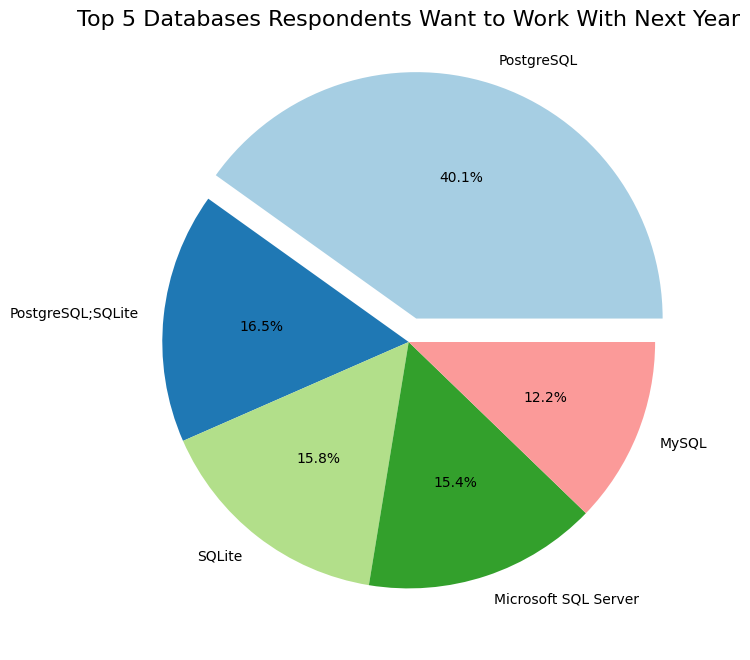

In [75]:
## Write your code here

# Get the top 5 databases
top_5_dbs = db_counts.head(5)

# Identify the index of the largest slice
explode = [0.1 if i == top_5_dbs.idxmax() else 0 for i in top_5_dbs.index]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_dbs, labels=top_5_dbs.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, explode=explode)
plt.title('Top 5 Databases Respondents Want to Work With Next Year', fontsize=16)

# Show the pie chart
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [83]:
# Query to extract the required columns
QUERY = "SELECT TimeSearching, TimeAnswering, Age FROM main"
df = pd.read_sql_query(QUERY, conn)

# Filter data for the age group 30 to 35
df_age_group = df[df['Age'] == '35-44 years old']

# Print unique values and their counts for the filtered data
for column in ['TimeSearching', 'TimeAnswering']:
    print(f"Unique values and counts in '{column}':")
    print(df_age_group[column].value_counts())
    print()

Unique values and counts in 'TimeSearching':
TimeSearching
30-60 minutes a day           2924
15-30 minutes a day           2275
60-120 minutes a day          1309
Less than 15 minutes a day     910
Over 120 minutes a day         542
Name: count, dtype: int64

Unique values and counts in 'TimeAnswering':
TimeAnswering
30-60 minutes a day           2522
15-30 minutes a day           2367
Less than 15 minutes a day    1374
60-120 minutes a day          1229
Over 120 minutes a day         463
Name: count, dtype: int64



In [84]:
# Calculate the median for TimeSearching and TimeAnswering for the age group 30 to 35
df_age_group['TimeSearching_num'] = df_age_group['TimeSearching'].map({
    'Less than 15 minutes a day': 0,
    '15-30 minutes a day': 1,
    '30-60 minutes a day': 2,
    '60-120 minutes a day': 3,
    'Over 120 minutes a day': 4
})

df_age_group['TimeAnswering_num'] = df_age_group['TimeAnswering'].map({
    'Less than 15 minutes a day': 0,
    '15-30 minutes a day': 1,
    '30-60 minutes a day': 2,
    '60-120 minutes a day': 3,
    'Over 120 minutes a day': 4
})

# Calculate the median for TimeSearching and TimeAnswering
median_time_searching = df_age_group.groupby('Age')['TimeSearching_num'].median().reset_index()
median_time_answering = df_age_group.groupby('Age')['TimeAnswering_num'].median().reset_index()

# Merge the two dataframes
median_data = pd.merge(median_time_searching, median_time_answering, on='Age', suffixes=('_searching', '_answering'))

/tmp/ipykernel_1028/2461507455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_group['TimeSearching_num'] = df_age_group['TimeSearching'].map({
/tmp/ipykernel_1028/2461507455.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_group['TimeAnswering_num'] = df_age_group['TimeAnswering'].map({


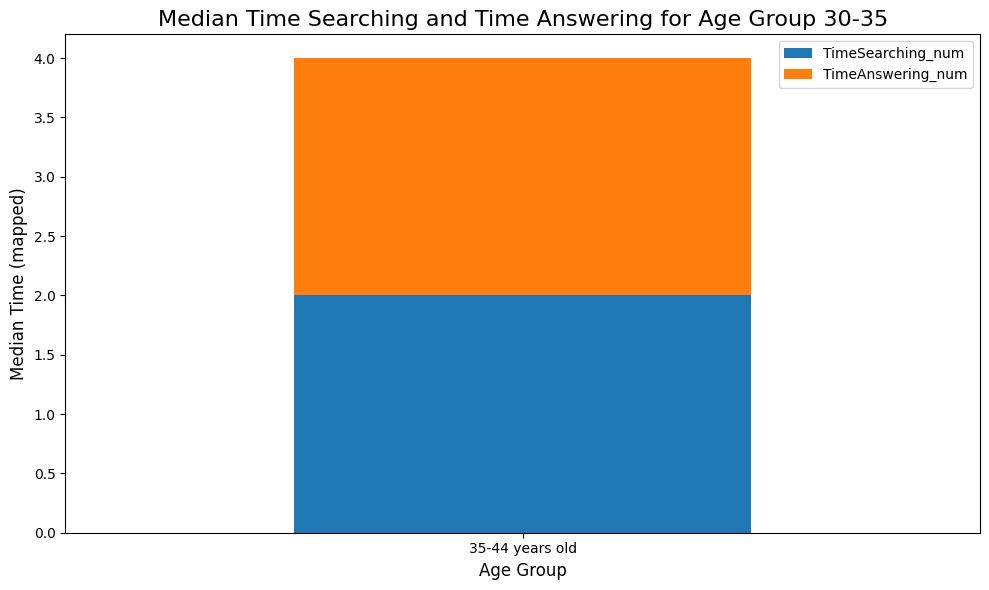

In [85]:
## Write your code here

# Plot a stacked bar chart
median_data.set_index('Age')[['TimeSearching_num', 'TimeAnswering_num']].plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Median Time Searching and Time Answering for Age Group 30-35', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Time (mapped)', fontsize=12)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [89]:
## Write your code here

# Query to extract Age and CompTotal
QUERY = "SELECT Age, CompTotal FROM main WHERE Age IN ('45-54 years old', '55-64 years old')"
df_age_comp = pd.read_sql_query(QUERY, conn)

# Print unique values for 'Age' and 'CompTotal' columns
print("Unique values for 'Age':")
for column in ['Age']:
    print(f"Unique values in '{column}':")
    print(df_age_comp[column].unique())
    print()

Unique values for 'Age':
Unique values in 'Age':
['45-54 years old' '55-64 years old']



In [102]:
# Clean up the 'Age' column to extract the numeric range (e.g., "45-54" or "55-64")
df_age_comp['Age_group'] = df_age_comp['Age'].str.extract(r'(\d{2}-\d{2})')[0]

# Generate random ages within the specified ranges
def generate_random_age(age_group):
    if age_group == '45-54':
        return np.random.randint(45, 55)  # Random age between 45 and 54
    elif age_group == '55-64':
        return np.random.randint(55, 65)  # Random age between 55 and 64

# Apply the function to create a new 'RandomAge' column
df_age_comp['RandomAge'] = df_age_comp['Age_group'].apply(generate_random_age)

# Print the first few rows to verify
print(df_age_comp.head())

               Age  CompTotal  RandomAge Age_group
0  45-54 years old        NaN         46     45-54
1  45-54 years old        NaN         51     45-54
2  45-54 years old        NaN         49     45-54
3  45-54 years old        NaN         51     45-54
4  45-54 years old        NaN         52     45-54


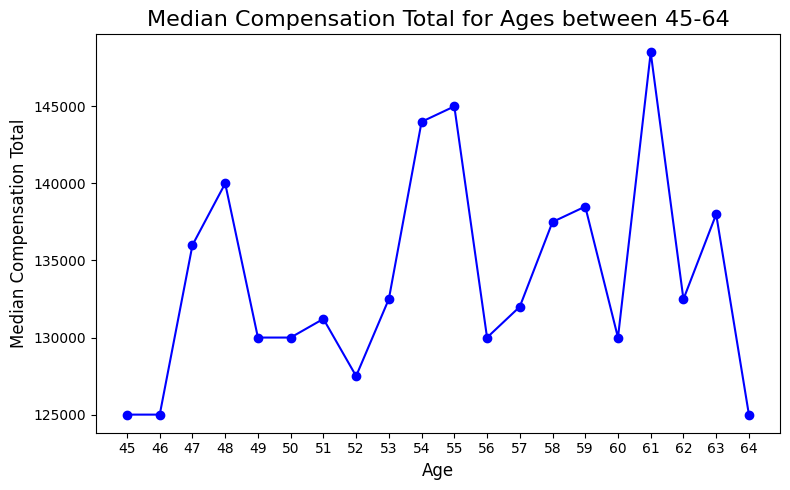

In [104]:
# Calculate the median CompTotal for each random age
median_comp_total = df_age_comp.groupby('RandomAge')['CompTotal'].median().reset_index()

# Plot the median Compensation Total for each generated age as a line chart
plt.figure(figsize=(8, 5))
plt.plot(median_comp_total['RandomAge'], median_comp_total['CompTotal'], marker='o', linestyle='-', color='blue')

# Adding labels and title
plt.title('Median Compensation Total for Ages between 45-64', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Median Compensation Total', fontsize=12)

# Set x-axis ticks to display only whole numbers (int values)
plt.xticks(np.arange(min(median_comp_total['RandomAge']), max(median_comp_total['RandomAge']) + 1, 1))

# Show the plot
plt.tight_layout()
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [109]:
# Query to extract the 'MainBranch' column
query = "SELECT MainBranch FROM main"
df_main_branch = pd.read_sql_query(query, conn)

# Get the count of each unique value in 'MainBranch'
main_branch_counts = df_main_branch['MainBranch'].value_counts()

print(main_branch_counts)

MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64


In [ ]:
## Write your code here

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
